In [350]:
import pandas as pd
import numpy as np
import difflib
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

import nltk
from nltk.corpus import stopwords

from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

In [333]:
# constants
DATA_PATH = '../data/'
EDUCATION_PATH = DATA_PATH + 'education/'
IMG_PATH = DATA_PATH + 'images/'

stop_words = set(stopwords.words('english'))

In [334]:
try:
    df_rankings = pd.read_pickle(EDUCATION_PATH + 'college-rankings.pickle')
    df_regions = pd.read_pickle(EDUCATION_PATH + 'salaries-by-region.pickle')
    df_degrees = pd.read_pickle(EDUCATION_PATH + 'degrees-that-pay-back.pickle')
    df_type = pd.read_pickle(EDUCATION_PATH + 'salaries-by-college-type.pickle')

except FileNotFoundError:

    df_rankings = pd.read_csv(EDUCATION_PATH + 'college-rankings.csv',encoding = 'ISO-8859-1')
    df_regions = pd.read_csv(EDUCATION_PATH + 'salaries-by-region.csv',encoding = 'ISO-8859-1')
    df_degrees = pd.read_csv(EDUCATION_PATH + 'degrees-that-pay-back.csv',encoding = 'ISO-8859-1')
    df_type = pd.read_csv(EDUCATION_PATH + 'salaries-by-college-type.csv',encoding = 'ISO-8859-1')
    
    df_rankings.to_pickle(EDUCATION_PATH + 'college-rankings.pickle')
    df_regions.to_pickle(EDUCATION_PATH + 'salaries-by-region.pickle')
    df_degrees.to_pickle(EDUCATION_PATH + 'degrees-that-pay-back.pickle')
    df_type.to_pickle(EDUCATION_PATH +'salaries-by-college-type.pickle')

In [335]:
df_degrees.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [336]:
df_type_region = pd.merge(df_type, df_regions, on='School Name')

In [337]:
fuzzy_match = df_rankings['Name'].map(lambda x: difflib.get_close_matches(x, df_type_region['School Name']))

In [338]:
for i,row in df_rankings.iterrows():
    if(len(fuzzy_match[i]) > 0):
        df_rankings.loc[i,'Name'] = fuzzy_match[i][0]
df_rankings['Name']
df_type_region_rankings = pd.merge(df_type_region, df_rankings, how='left', left_on='School Name', right_on='Name')

In [339]:
df_type_region_rankings.head()

,School Name,School Type,Starting Median Salary_x,Mid-Career Median Salary_x,Mid-Career 10th Percentile Salary_x,Mid-Career 25th Percentile Salary_x,Mid-Career 75th Percentile Salary_x,Mid-Career 90th Percentile Salary_x,Region,Starting Median Salary_y,...,Mid-Career 25th Percentile Salary_y,Mid-Career 75th Percentile Salary_y,Mid-Career 90th Percentile Salary_y,Name,Location,Rank,Description,Tuition and fees,In-state,Undergrad Enrollment
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00",Northeastern,"$72,200.00",...,"$99,200.00","$168,000.00","$220,000.00",Massachusetts Institute of Technology (MIT),"Cambridge, MA",7.0,"MIT is located in Cambridge, Massachusetts, ac...","$48,452",NaN,"4,527"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN,California,"$75,500.00",...,"$104,000.00","$161,000.00",NaN,California Institute of Technology (CIT),"Pasadena, CA",12.0,"Caltech, which focuses on science and engineer...","$47,577",NaN,"1,001"
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN,California,"$71,800.00",...,"$96,000.00","$180,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00",Northeastern,"$62,400.00",...,"$94,300.00","$143,000.00","$190,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN,Northeastern,"$62,200.00",...,"$80,200.00","$142,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [340]:
df_type_region_rankings.drop(df_type_region_rankings.columns[9:16], axis=1,inplace=True)
df_type_region_rankings.drop(df_type_region_rankings.columns[[12,13]], axis=1,inplace=True)

In [341]:
df_type_region_rankings.head()

,School Name,School Type,Starting Median Salary_x,Mid-Career Median Salary_x,Mid-Career 10th Percentile Salary_x,Mid-Career 25th Percentile Salary_x,Mid-Career 75th Percentile Salary_x,Mid-Career 90th Percentile Salary_x,Region,Location,Rank,Description,Undergrad Enrollment
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00",Northeastern,"Cambridge, MA",7.0,"MIT is located in Cambridge, Massachusetts, ac...","4,527"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN,California,"Pasadena, CA",12.0,"Caltech, which focuses on science and engineer...","1,001"
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN,California,NaN,NaN,NaN,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00",Northeastern,NaN,NaN,NaN,NaN
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN,Northeastern,NaN,NaN,NaN,NaN


In [342]:
eng_df = df_type_region_rankings[df_type_region_rankings['School Type'] == 'Engineering']
state_df = df_type_region_rankings[df_type_region_rankings['School Type'] == 'State']
ivy_df = df_type_region_rankings[df_type_region_rankings['School Type'] == 'Ivy League']
lib_df = df_type_region_rankings[df_type_region_rankings['School Type'] == 'Liberal Arts']
party_df = df_type_region_rankings[df_type_region_rankings['School Type'] == 'Party']

In [343]:
def find_median_numeric_col(df,col_name):
    df[col_name] = df[col_name].str.replace('$','')
    df[col_name] = df[col_name].str.replace(',','')
    return df[col_name].median()

def get_median_salaries_to_plot(salary_list, df_list):
    all_sals = []
    for df in df_list:
        median_sals = []
        for sal_type in salary_list:
            median_sals.append(find_median_numeric_col(df,sal_type))
        
        all_sals.append(median_sals)
    return all_sals

In [344]:
salary_list = ['Starting Median Salary_x','Mid-Career Median Salary_x']
salary_name_list = ['Start Career','Mid-Career']
df_list = [eng_df, state_df, ivy_df, lib_df, party_df]
df_name_list = ['Engineering', 'State', 'Ivy League', 'Liberal Arts', 'Party']

median_sals = get_median_salaries_to_plot(salary_list, df_list)

percentile_name_list = ['10th','25th ','75th','90th']
percentile_list = ['Mid-Career 10th Percentile Salary_x','Mid-Career 25th Percentile Salary_x','Mid-Career 75th Percentile Salary_x','Mid-Career 90th Percentile Salary_x']
percentile_median_sals = get_median_salaries_to_plot(percentile_list, df_list)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


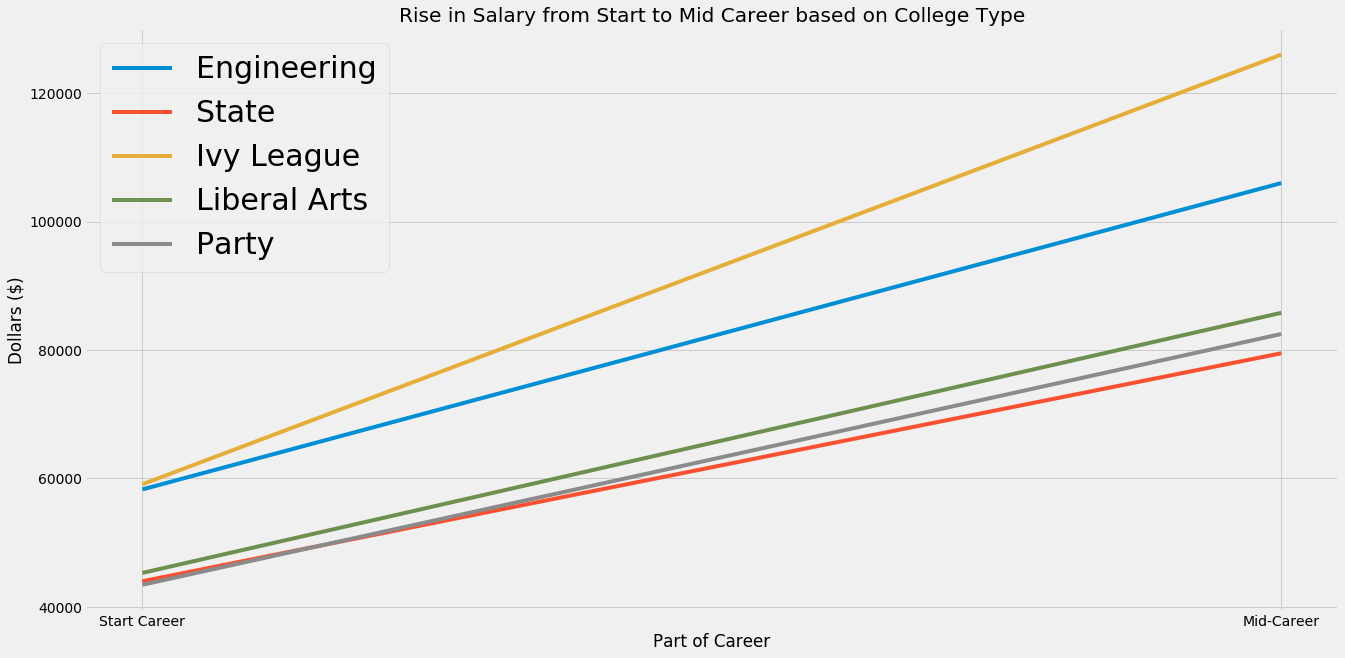

In [345]:
ticks = np.arange(2)
fig,ax = plt.subplots(figsize=(20, 10))
for k in range(len(median_sals)):
    label = df_name_list[k]
    ax.set_xticks(ticks)
    ax.set_xticklabels(salary_name_list)
    ax.plot(ticks, median_sals[k], label=label)

plt.legend(loc='best',prop={'size': 30})
ax.set_xlabel('Part of Career')
ax.set_ylabel('Dollars ($)')
ax.set_title('Rise in Salary from Start to Mid Career based on College Type')
plt.show()    

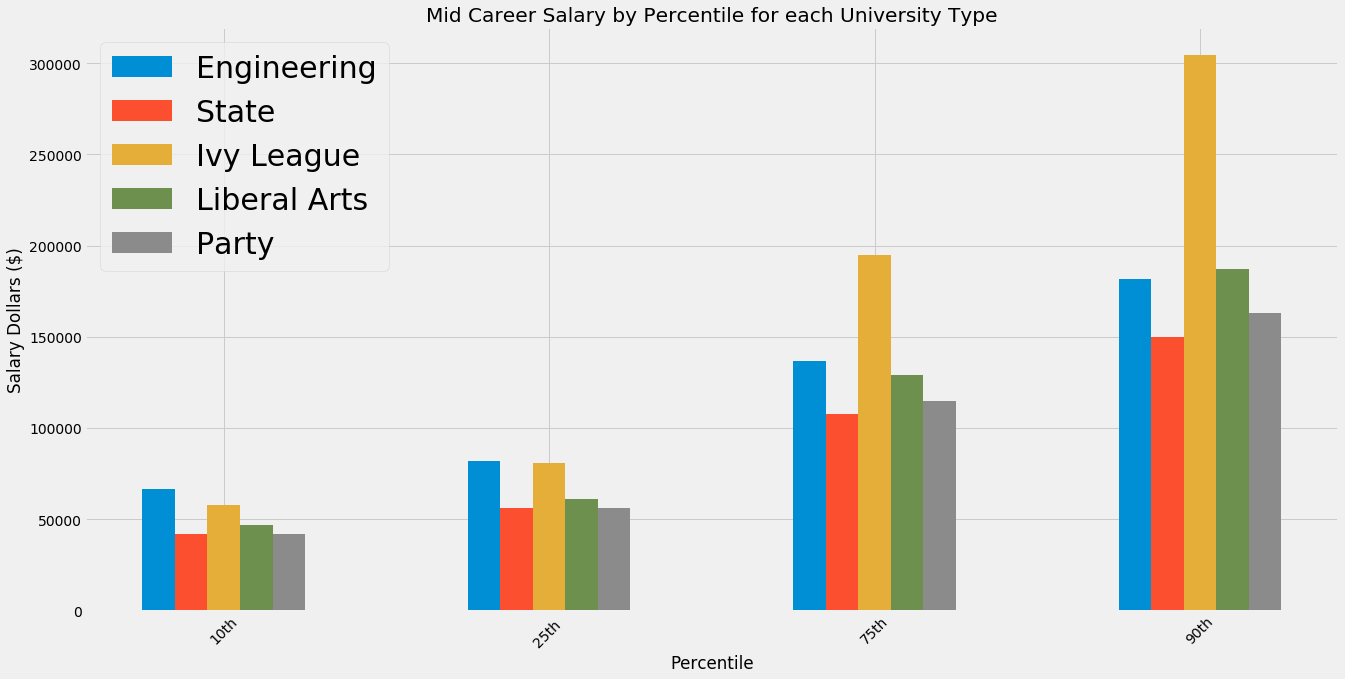

In [346]:
fig,ax1 = plt.subplots(figsize=(20, 10))
ticks = np.array([2,4,6,8])
move = -.4
width = np.min(np.diff(ticks))/10
for k in range(len(percentile_median_sals)):
    label = df_name_list[k]
    ax1.set_xticks(ticks)
    ax1.set_xticklabels(percentile_name_list, rotation=45)
    ax1.bar(ticks+move, percentile_median_sals[k],width=width, label=label)
    move += .2
plt.legend(loc='best', prop={'size': 30})
ax1.set_title('Mid Career Salary by Percentile for each University Type')
ax1.set_xlabel('Percentile')
ax1.set_ylabel('Salary Dollars ($)')

plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


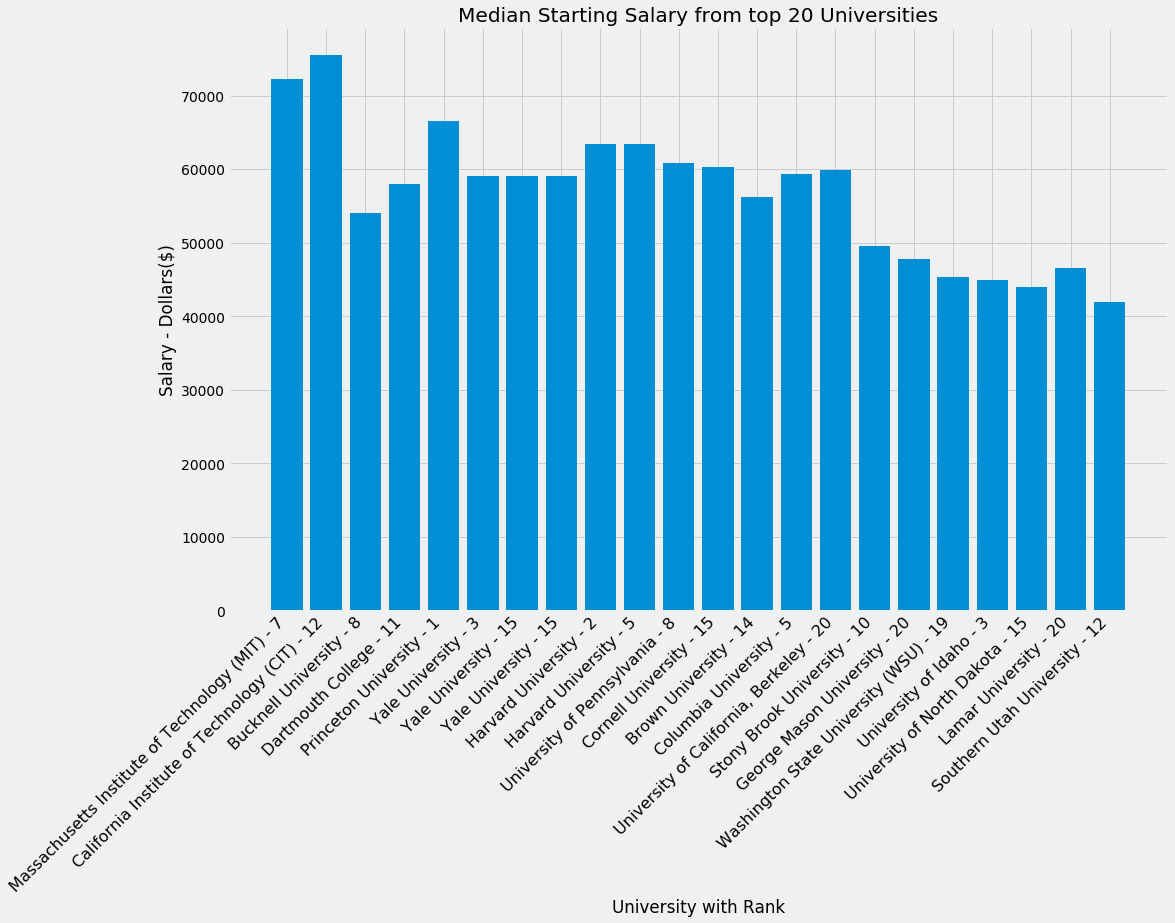

In [347]:
top_num = 20
top_rank_df = df_type_region_rankings[df_type_region_rankings['Rank'] <= top_num]
top_rank_df['Starting Median Salary_x'] = top_rank_df['Starting Median Salary_x'].str.replace(',', '')
top_rank_df['Starting Median Salary_x'] = top_rank_df['Starting Median Salary_x'].str.replace('$', '')

name_list = [ row['School Name'] + ' - ' + str(int(row['Rank'])) for _,row in top_rank_df.iterrows()]
start_sal_list = top_rank_df['Starting Median Salary_x'].tolist()

f, ax = plt.subplots(figsize=(15,10))

ax.bar(range(len(start_sal_list)), start_sal_list, align='center')
ax.set_xticks(range(len(name_list)))
ax.set_xticklabels(name_list, rotation=45, fontsize=16, ha='right')
ax.set_title('Median Starting Salary from top ' + str(top_num) + ' Universities')
ax.set_xlabel('University with Rank')
ax.set_ylabel('Salary - Dollars($)')

plt.show()

In [348]:
df_degrees.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


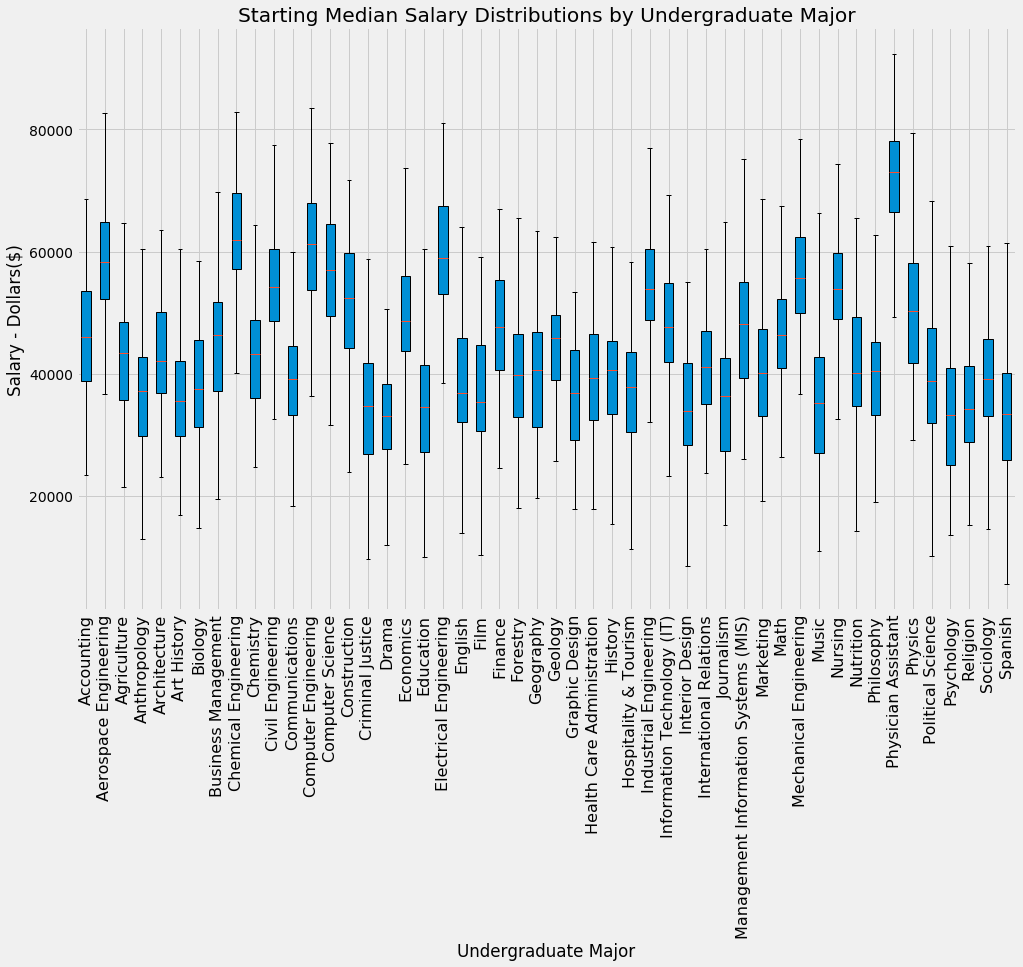

In [390]:
df_degrees['Starting Median Salary'] = df_degrees['Starting Median Salary'].str.replace(',', '')
df_degrees['Starting Median Salary'] = df_degrees['Starting Median Salary'].str.replace('$', '')
degree_list = df_degrees['Undergraduate Major'].tolist()
f, ax = plt.subplots(figsize=(15,10))

all_data = [np.random.normal(float(row['Starting Median Salary']), 10000, 100) for _,row in df_degrees.iterrows()]
ax.boxplot(all_data, sym='',patch_artist=True)
ax.set_xticks(range(1,51))
ax.set_xticklabels(degree_list, rotation=90, fontsize=16)
ax.set_xlabel('Undergraduate Major')
ax.set_ylabel('Salary - Dollars($)')
ax.set_title('Starting Median Salary Distributions by Undergraduate Major')
plt.show()